In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [28]:
video = cv.VideoCapture("CoverImages/Cooking.MP4")

In [29]:
i = 1
while True:
    ret,frame = video.read()

    if ret == False:
        break

    gframe = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    cv.imwrite("./vout/picture" + str(i) + ".png", frame)
    cv.imwrite("./grayvout/picture" + str(i) + ".png", gframe)
    i = i+1
    
    cv.imshow(" Video is playing", frame)
    key = cv.waitKey(1)
    if key == ord('q'):
        break
    if key == ord('m'):
        cv.waitKey(-1)
    
video.release()
cv.destroyAllWindows()

In [4]:
def calEntropy(image):
    row, col = image.shape
    n = row*col
    pixel1 = list(image.ravel())
    pixel2 = set(pixel1)

    fre = {}
    for key in pixel2:
        fre[key] = pixel1.count(key)/n
        
    l = list(fre.keys())


    entropy = 0
    for x in l:
        entropy = entropy + fre[x]*math.log(fre[x],2)
    entropy = (-1)*entropy
    return entropy

In [5]:
def getKey(fname):
    fin = 7
    lin = fname.index('.')
    result = fname[fin:lin]
    return int(result)

In [6]:
def sortFile(files):
    files.sort(key = getKey)

In [7]:
files = os.listdir('./grayvout')

In [8]:
print(files[:20])

['picture1.png', 'picture10.png', 'picture100.png', 'picture1000.png', 'picture1001.png', 'picture1002.png', 'picture1003.png', 'picture1004.png', 'picture1005.png', 'picture1006.png', 'picture1007.png', 'picture1008.png', 'picture1009.png', 'picture101.png', 'picture1010.png', 'picture1011.png', 'picture1012.png', 'picture1013.png', 'picture1014.png', 'picture1015.png']


In [9]:
sortFile(files)
print(files[:20])

['picture1.png', 'picture2.png', 'picture3.png', 'picture4.png', 'picture5.png', 'picture6.png', 'picture7.png', 'picture8.png', 'picture9.png', 'picture10.png', 'picture11.png', 'picture12.png', 'picture13.png', 'picture14.png', 'picture15.png', 'picture16.png', 'picture17.png', 'picture18.png', 'picture19.png', 'picture20.png']


# Plot the Histogram of All Frames

In [22]:
listed = []
for f in files:
    image = cv.imread('./grayvout/' + f, 0)
    error = calEntropy(image)
    listed.append(error)

KeyboardInterrupt: 

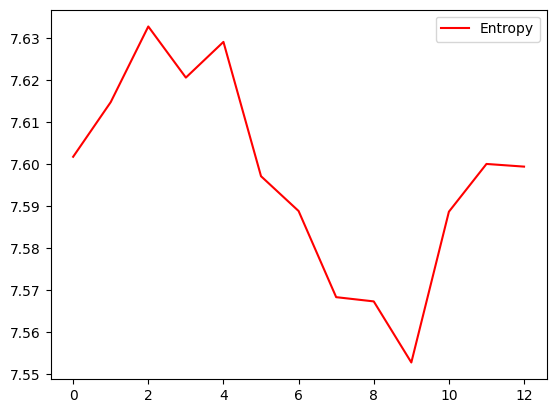

In [12]:
x = [i for i in range(len(listed))]
plt.plot(x,listed,color = 'r', label = 'Entropy')
plt.legend()
plt.show()

In [13]:
# Reduce the Number of Frames
def calculate_frame_changes(files):
    prev_hist = None
    changes = []
    for f in files:
        image = cv.imread('./grayvout/' + f, 0)
        hist = cv.calcHist([image], [0], None, [256], [0, 256])

        if prev_hist is not None:
            diff = cv.compareHist(prev_hist, hist, cv.HISTCMP_CHISQR)
            changes.append((f, diff))
        prev_hist = hist
    return changes

In [14]:
changes = calculate_frame_changes(files)

In [15]:
for item in changes:
    filename, difference = item
    print("Filename:", filename)
    print("Histogram Difference:", difference)

Filename: picture2.png
Histogram Difference: 1079.3854088027076
Filename: picture3.png
Histogram Difference: 1550.6344480025568
Filename: picture4.png
Histogram Difference: 943.2791202209066
Filename: picture5.png
Histogram Difference: 905.3833160622222
Filename: picture6.png
Histogram Difference: 817.9579842222769
Filename: picture7.png
Histogram Difference: 741.0048166784633
Filename: picture8.png
Histogram Difference: 569.7315577901397
Filename: picture9.png
Histogram Difference: 553.1003948672292
Filename: picture10.png
Histogram Difference: 557.267202680275
Filename: picture11.png
Histogram Difference: 1614.8656997910646
Filename: picture12.png
Histogram Difference: 782.2968620059271
Filename: picture13.png
Histogram Difference: 1409.8953029108807
Filename: picture14.png
Histogram Difference: 2266.664389553988
Filename: picture15.png
Histogram Difference: 2191.2775271703367
Filename: picture16.png
Histogram Difference: 1451.4568788992476
Filename: picture17.png
Histogram Differenc

In [16]:
def select_frames(changes, num_frames=10):
    changes.sort(key=lambda x: x[1], reverse=True)
    selected_frames = [x[0] for x in changes[:num_frames]]
    return selected_frames

In [17]:
# Calculate frame changes based on histogram differences
frame_changes = calculate_frame_changes(files)

In [18]:
selected_frames = select_frames(frame_changes, num_frames=10)

In [19]:
# Plot the selected frames
listed = []
for f in selected_frames:
    image = cv.imread('./grayvout/' + f, 0)
    final_imgs = calEntropy(image)
    listed.append(final_imgs)

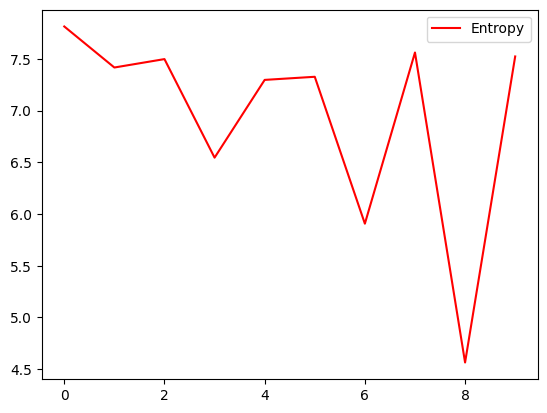

In [20]:
x = [i for i in range(len(listed))]
plt.plot(x, listed, color='r', label='Entropy')
plt.legend()
plt.show()

In [21]:
# selected_frames_dir = './selectedFrames'
# for f in selected_frames:
#     image = cv.imread('./grayvout1/' + f, 0)
#     cv.imwrite(f"{selected_frames_dir}/{f}", image)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:786: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'
